In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
!ls ../dados/banks

banks.csv  banks.xlsx


In [28]:
dfcsv = pd.read_csv('../dados/banks/banks.csv')

In [29]:
dfxls = pd.read_excel('../dados/banks/banks.xlsx', sheet_name=1)

In [30]:
dfxls.columns = dfcsv.columns

In [31]:
banks = pd.concat((dfcsv, dfxls))

In [32]:
banks

Unnamed: 0                                          Bank Name  \
0           387                            Madisonville State Bank   
1           153                                     Signature Bank   
2           331                                     Statewide Bank   
3           100                               Global Commerce Bank   
4           254                                   The Cowlitz Bank   
..          ...                                                ...   
160         305                     Peotone Bank and Trust Company   
161         113        Premier Community Bank of the Emerald Coast   
162         475                             American Southern Bank   
163          74  Second Federal Savings and Loan Association of...   
164          91                            Plantation Federal Bank   

               City  ST   CERT          Acquiring Institution Closing Date  \
0      Madisonville  TX  33782                 U.S. Bank N.A.    30-Oct-09   
1           Windsor  CO  57835     Points West Community Bank     8-Jul-11   
2         Covington  LA  29561                      Home Bank    12-Mar-10   
3         Doraville  GA  34046                Metro City Bank     2-Mar-12   
4          Longview  WA  22643                  Heritage Bank    30-Jul-10   
..              ...  ..    ...                            ...          ...   
160         Peotone  IL  10888             First Midwest Bank    23-Apr-10   
161       Crestview  FL  58343                    Summit Bank    16-Dec-11   
162        Kennesaw  GA  57943          Bank of North Georgia    24-Apr-09   
163         Chicago  IL  27986  Hinsdale Bank & Trust Company    20-Jul-12   
164  Pawleys Island  SC  32503             First Federal Bank    27-Apr-12   

    Updated Date  
0      22-Aug-12  
1      26-Oct-12  
2      23-Aug-12  
3      26-Jun-14  
4      22-Aug-12  
..           ...  
160    23-Aug-12  
161    21-Mar-14  
162    17-Aug-12  
163    14-Jan-13  
164    10-Nov-16  

[551 rows x 8 columns]

## Use o comando abaixo para gerar uma coluna nova BankInfo.
```
df['BankInfo'] = df.apply(
    lambda row: f"{row['Bank Name']}, {row['City']}, {row['ST']} {row['CERT']}", axis=1
)
```
Supondo que você tivesse apenas essa coluna BankInfo, faça um código para obter os dados no formato original (em colunas separadas para nome do banco, cidade, estado e CERT)

In [33]:
banks['BankInfo'] = banks.apply(
    lambda row: f"{row['Bank Name']}, {row['City']}, {row['ST']} {row['CERT']}", axis=1
)

In [53]:
banks[['BankInfo']].apply(lambda x: str(x).split(','), axis=1)

0      [BankInfo    Madisonville State Bank,  Madison...
1      [BankInfo    Signature Bank,  Windsor,  CO 578...
2      [BankInfo    Statewide Bank,  Covington,  LA 2...
3      [BankInfo    Global Commerce Bank,  Doraville,...
4      [BankInfo    The Cowlitz Bank,  Longview,  WA ...
                             ...                        
160    [BankInfo    Peotone Bank and Trust Company,  ...
161    [BankInfo    Premier Community Bank of the Eme...
162    [BankInfo    American Southern Bank,  Kennesaw...
163    [BankInfo    Second Federal Savings and Loan A...
164    [BankInfo    Plantation Federal Bank,  Pawleys...
Length: 551, dtype: object

In [56]:
s = banks['BankInfo'].str.strip().str.split(',', expand=True)

In [65]:
s[4].values

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, No

In [69]:
banks[['BankInfo']][s[4] == ' MN 31495'].values

array([['Inter Savings Bank, fsb D/B/A InterBank, fsb, Maple Grove, MN 31495']],
      dtype=object)

In [70]:
banks['BankInfo'].head(2).values

array(['Madisonville State Bank, Madisonville, TX 33782',
       'Signature Bank, Windsor, CO 57835'], dtype=object)

In [38]:
banks['BankInfo'].str.split(',', expand=True)

0                1  \
0                              Madisonville State Bank     Madisonville   
1                                       Signature Bank          Windsor   
2                                       Statewide Bank        Covington   
3                                 Global Commerce Bank        Doraville   
4                                     The Cowlitz Bank         Longview   
..                                                 ...              ...   
160                     Peotone Bank and Trust Company          Peotone   
161        Premier Community Bank of the Emerald Coast        Crestview   
162                             American Southern Bank         Kennesaw   
163  Second Federal Savings and Loan Association of...          Chicago   
164                            Plantation Federal Bank   Pawleys Island   

             2     3     4  
0     TX 33782  None  None  
1     CO 57835  None  None  
2     LA 29561  None  None  
3     GA 34046  None  None  
4     WA 22643  None  None  
..         ...   ...   ...  
160   IL 10888  None  None  
161   FL 58343  None  None  
162   GA 57943  None  None  
163   IL 27986  None  None  
164   SC 32503  None  None  

[551 rows x 5 columns]

In [71]:
banks['BankInfo'].head(2).values

array(['Madisonville State Bank, Madisonville, TX 33782',
       'Signature Bank, Windsor, CO 57835'], dtype=object)

In [94]:
## Resposta aqui:
banks['cert'] = banks['BankInfo'].apply(
    lambda x: x.split(' ')[-1]
)
banks['estado'] = banks['BankInfo'].apply(
    lambda x: x.split(',')[-1].strip().split(' ')[0]
)
banks['cidade'] = banks['BankInfo'].apply(
    lambda x: x.split(',')[-2]
)
banks['nome'] = banks['BankInfo'].apply(
    lambda x: ','.join(x.split(',')[0:-2])
)

In [95]:
banks['nome'][s[4] == ' MN 31495']

34    Inter Savings Bank, fsb D/B/A InterBank, fsb
Name: nome, dtype: object

In [96]:
banks['cidade'][s[4] == ' MN 31495']

34     Maple Grove
Name: cidade, dtype: object

In [99]:
banks.shape, s[4].shape

((551, 13), (551,))

In [105]:
pd.concat((banks, s[4]), axis=1)

Unnamed: 0                                          Bank Name  \
0           387                            Madisonville State Bank   
1           153                                     Signature Bank   
2           331                                     Statewide Bank   
3           100                               Global Commerce Bank   
4           254                                   The Cowlitz Bank   
..          ...                                                ...   
160         305                     Peotone Bank and Trust Company   
161         113        Premier Community Bank of the Emerald Coast   
162         475                             American Southern Bank   
163          74  Second Federal Savings and Loan Association of...   
164          91                            Plantation Federal Bank   

               City  ST   CERT          Acquiring Institution Closing Date  \
0      Madisonville  TX  33782                 U.S. Bank N.A.    30-Oct-09   
1           Windsor  CO  57835     Points West Community Bank     8-Jul-11   
2         Covington  LA  29561                      Home Bank    12-Mar-10   
3         Doraville  GA  34046                Metro City Bank     2-Mar-12   
4          Longview  WA  22643                  Heritage Bank    30-Jul-10   
..              ...  ..    ...                            ...          ...   
160         Peotone  IL  10888             First Midwest Bank    23-Apr-10   
161       Crestview  FL  58343                    Summit Bank    16-Dec-11   
162        Kennesaw  GA  57943          Bank of North Georgia    24-Apr-09   
163         Chicago  IL  27986  Hinsdale Bank & Trust Company    20-Jul-12   
164  Pawleys Island  SC  32503             First Federal Bank    27-Apr-12   

    Updated Date                                           BankInfo   cert  \
0      22-Aug-12    Madisonville State Bank, Madisonville, TX 33782  33782   
1      26-Oct-12                  Signature Bank, Windsor, CO 57835  57835   
2      23-Aug-12                Statewide Bank, Covington, LA 29561  29561   
3      26-Jun-14          Global Commerce Bank, Doraville, GA 34046  34046   
4      22-Aug-12               The Cowlitz Bank, Longview, WA 22643  22643   
..           ...                                                ...    ...   
160    23-Aug-12  Peotone Bank and Trust Company, Peotone, IL 10888  10888   
161    21-Mar-14  Premier Community Bank of the Emerald Coast, C...  58343   
162    17-Aug-12         American Southern Bank, Kennesaw, GA 57943  57943   
163    14-Jan-13  Second Federal Savings and Loan Association of...  27986   
164    10-Nov-16  Plantation Federal Bank, Pawleys Island, SC 32503  32503   

    estado           cidade  \
0       TX     Madisonville   
1       CO          Windsor   
2       LA        Covington   
3       GA        Doraville   
4       WA         Longview   
..     ...              ...   
160     IL          Peotone   
161     FL        Crestview   
162     GA         Kennesaw   
163     IL          Chicago   
164     SC   Pawleys Island   

                                                  nome     4  
0                              Madisonville State Bank  None  
1                                       Signature Bank  None  
2                                       Statewide Bank  None  
3                                 Global Commerce Bank  None  
4                                     The Cowlitz Bank  None  
..                                                 ...   ...  
160                     Peotone Bank and Trust Company  None  
161        Premier Community Bank of the Emerald Coast  None  
162                             American Southern Bank  None  
163  Second Federal Savings and Loan Association of...  None  
164                            Plantation Federal Bank  None  

[551 rows x 14 columns]

In [108]:
banks[(banks == "Points West Community Bank").any(axis=1)]

Unnamed: 0       Bank Name     City  ST   CERT       Acquiring Institution  \
1         153  Signature Bank  Windsor  CO  57835  Points West Community Bank   

  Closing Date Updated Date                           BankInfo   cert estado  \
1     8-Jul-11    26-Oct-12  Signature Bank, Windsor, CO 57835  57835     CO   

     cidade            nome  
1   Windsor  Signature Bank

In [111]:
banks['Bank Name'][banks["CERT"] == banks["CERT"].max()]

187    Pisgah Community Bank
Name: Bank Name, dtype: object

Quantos bancos o State Bank of Texas adquiriu? Quantos eram realmente no Texas? (mostre com uma visualização)

In [119]:
qtd = banks[banks['Acquiring Institution'] == "State Bank of Texas"].ST.value_counts()
qtd

IL    2
TX    1
Name: ST, dtype: int64

In [121]:
qtd.plot.barh()

In [125]:
qtd.values

array([2, 1])

In [159]:
plt.figure(figsize=(3, 3))
plt.bar(qtd.index, qtd.values)

<BarContainer object of 2 artists>

Quantos bancos fecharam em cada ano? (mostre com uma visualização que evidencie o ano de pico)

In [133]:
banks['Closing Date'] = pd.to_datetime(banks['Closing Date'])

In [135]:
banks['year'] = banks['Closing Date'].dt.year.copy()

In [137]:
type(banks['year'].value_counts())

pandas.core.series.Series

In [143]:
banks['year'].value_counts().sort_index().plot(kind = "bar") 

Quais cidades na Californa tem mais bancos falidos? (mostre com uma visualização)

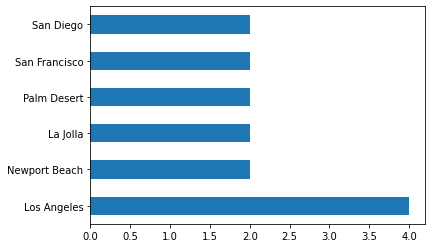

In [156]:
banks[banks.ST == 'CA'].City.value_counts().head(6).plot.barh()

In [158]:
banks[banks.ST == 'CA'].City.value_counts().plot.barh(figsize=(8, 8))

In [149]:
banks[banks.ST == 'CA'].groupby('City').size()

City
Bakersfield         1
Calabasas           1
Chico               1
Culver City         1
Granite Bay         1
Irvine              1
La Jolla            2
Los Angeles         4
Merced              1
Napa                1
Nevada City         1
Newport Beach       2
Oakland             1
Palm Desert         2
Palm Springs        1
Pasadena            1
Pomona              1
Rancho Cucamonga    1
Redlands            1
San Clemente        1
San Diego           2
San Francisco       2
San Luis Obispo     1
San Rafael          1
Santa Monica        1
Solvang             1
Sonoma              1
Stockton            1
Temecula            1
Torrance            1
Ventura             1
Westminster         1
Woodland Hills      1
dtype: int64